In [1]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torch import nn
import os

# Download d·ªØ li·ªáu
!gdown 1vSevps_hV5zhVf6aWuN8X7dd-qSAIgcc
!unzip ./flower_photos.zip

# Load d·ªØ li·ªáu
data_path = "./flower_photos"
dataset = ImageFolder(root=data_path)

# L·∫•y th√¥ng tin c∆° b·∫£n
num_samples = len(dataset)
classes = dataset.classes
num_classes = len(dataset.classes)

# Chia d·ªØ li·ªáu th√†nh t·∫≠p train, validation v√† test
TRAIN_RATIO, VALID_RATIO = 0.8, 0.1
n_train_examples = int(num_samples * TRAIN_RATIO)
n_valid_examples = int(num_samples * VALID_RATIO)
n_test_examples = num_samples - n_train_examples - n_valid_examples

train_dataset, valid_dataset, test_dataset = random_split(
    dataset,
    [n_train_examples, n_valid_examples, n_test_examples]
)


Downloading...
From (original): https://drive.google.com/uc?id=1vSevps_hV5zhVf6aWuN8X7dd-qSAIgcc
From (redirected): https://drive.google.com/uc?id=1vSevps_hV5zhVf6aWuN8X7dd-qSAIgcc&confirm=t&uuid=8a22ab3d-6d13-40ee-b033-834f4d68978c
To: /content/flower_photos.zip
100% 230M/230M [00:02<00:00, 89.9MB/s]
Archive:  ./flower_photos.zip
   creating: flower_photos/
   creating: flower_photos/daisy/
  inflating: flower_photos/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flower_photos/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flower_photos/daisy/10172379554_b296050f82_n.jpg  
  inflating: flower_photos/daisy/10172567486_2748826a8b.jpg  
  inflating: flower_photos/daisy/10172636503_21bededa75_n.jpg  
  inflating: flower_photos/daisy/102841525_bd6628ae3c.jpg  
  inflating: flower_photos/daisy/1031799732_e7f4008c03.jpg  
  inflating: flower_photos/daisy/10391248763_1d16681106_n.jpg  
  inflating: flower_photos/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flower_photos/daisy/104377705

In [2]:
# K√≠ch th∆∞·ªõc ·∫£nh ƒë·∫ßu v√†o
IMG_SIZE = 224

# C√°c ph√©p bi·∫øn ƒë·ªïi cho t·∫≠p train
train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),       # Thay ƒë·ªïi k√≠ch th∆∞·ªõc ·∫£nh
    transforms.RandomHorizontalFlip(),            # L·∫≠t ng·∫´u nhi√™n ·∫£nh theo chi·ªÅu ngang
    transforms.RandomRotation(0.2),               # Xoay ng·∫´u nhi√™n ·∫£nh trong kho·∫£ng ¬±20 ƒë·ªô
    transforms.ToTensor(),                         # Chuy·ªÉn ƒë·ªïi ·∫£nh sang tensor
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Chu·∫©n h√≥a gi√° tr·ªã ·∫£nh
])

# C√°c ph√©p bi·∫øn ƒë·ªïi cho t·∫≠p validation v√† test
test_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# √Åp d·ª•ng ph√©p bi·∫øn ƒë·ªïi cho c√°c t·∫≠p d·ªØ li·ªáu
train_dataset.dataset.transform = train_transforms
valid_dataset.dataset.transform = test_transforms
test_dataset.dataset.transform = test_transforms


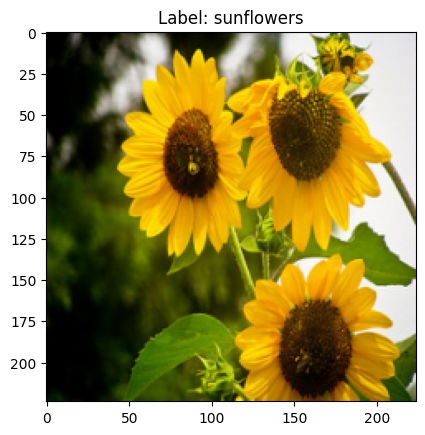

In [3]:
from matplotlib import pyplot as plt

# L·∫•y m·ªôt m·∫´u t·ª´ train_dataset
sample_img, sample_label = train_dataset[0]

# Chuy·ªÉn ƒë·ªïi t·ª´ tensor sang ·∫£nh
img = sample_img.permute(1, 2, 0).numpy()
img = (img * 0.5) + 0.5  # Ho√†n nguy√™n chu·∫©n h√≥a v·ªÅ [0, 1]

# Hi·ªÉn th·ªã ·∫£nh
plt.imshow(img)
plt.title(f"Label: {classes[sample_label]}")
plt.show()


In [4]:
from torch.utils.data import DataLoader

# K√≠ch th∆∞·ªõc batch
BATCH_SIZE = 512

# DataLoader cho t·∫≠p train
train_loader = DataLoader(
    train_dataset,
    shuffle=True,  # X√°o tr·ªôn d·ªØ li·ªáu trong m·ªói epoch
    batch_size=BATCH_SIZE
)

# DataLoader cho t·∫≠p validation
val_loader = DataLoader(
    valid_dataset,
    shuffle=False,  # Kh√¥ng c·∫ßn x√°o tr·ªôn t·∫≠p validation
    batch_size=BATCH_SIZE
)

# DataLoader cho t·∫≠p test
test_loader = DataLoader(
    test_dataset,
    shuffle=False,  # Kh√¥ng c·∫ßn x√°o tr·ªôn t·∫≠p test
    batch_size=BATCH_SIZE
)


In [5]:
# L·∫•y m·ªôt batch t·ª´ train_loader
for images, labels in train_loader:
    print(f"Batch size: {images.size(0)}")  # S·ªë l∆∞·ª£ng m·∫´u trong batch
    print(f"Image shape: {images.shape}")  # K√≠ch th∆∞·ªõc c·ªßa ·∫£nh (batch_size, channels, height, width)
    print(f"Labels: {labels[:5]}")  # In 5 nh√£n ƒë·∫ßu ti√™n
    break


Batch size: 512
Image shape: torch.Size([512, 3, 224, 224])
Labels: tensor([1, 0, 2, 4, 4])


In [6]:
import torch
import torch.nn as nn

# Transformer Encoder Block
class TransformerEncoder(nn.Module):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout=0.1):
        super().__init__()
        self.attn = nn.MultiheadAttention(
            embed_dim=embed_dim,
            num_heads=num_heads,
            batch_first=True
        )
        self.ffn = nn.Sequential(
            nn.Linear(in_features=embed_dim, out_features=ff_dim, bias=True),
            nn.ReLU(),
            nn.Linear(in_features=ff_dim, out_features=embed_dim, bias=True)
        )
        self.layernorm_1 = nn.LayerNorm(normalized_shape=embed_dim, eps=1e-6)
        self.layernorm_2 = nn.LayerNorm(normalized_shape=embed_dim, eps=1e-6)
        self.dropout_1 = nn.Dropout(p=dropout)
        self.dropout_2 = nn.Dropout(p=dropout)

    def forward(self, query, key, value):
        attn_output, _ = self.attn(query, key, value)
        attn_output = self.dropout_1(attn_output)
        out_1 = self.layernorm_1(query + attn_output)
        ffn_output = self.ffn(out_1)
        ffn_output = self.dropout_2(ffn_output)
        out_2 = self.layernorm_2(out_1 + ffn_output)
        return out_2

# Patch and Position Embedding
class PatchPositionEmbedding(nn.Module):
    def __init__(self, image_size=224, embed_dim=512, patch_size=16, device='cpu'):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=embed_dim, kernel_size=patch_size, stride=patch_size, bias=False)
        scale = embed_dim ** -0.5
        self.positional_embedding = nn.Parameter(scale * torch.randn((image_size // patch_size) ** 2, embed_dim))
        self.device = device

    def forward(self, x):
        x = self.conv1(x)  # shape: [*, embed_dim, grid, grid]
        x = x.reshape(x.shape[0], x.shape[1], -1)  # shape: [*, embed_dim, grid^2]
        x = x.permute(0, 2, 1)  # shape: [*, grid^2, embed_dim]
        x = x + self.positional_embedding.to(self.device)
        return x

# Vision Transformer Model
class VisionTransformerCls(nn.Module):
    def __init__(self, image_size, embed_dim, num_heads, ff_dim, dropout=0.1, device='cpu', num_classes=10, patch_size=16):
        super().__init__()
        self.embd_layer = PatchPositionEmbedding(
            image_size=image_size, embed_dim=embed_dim, patch_size=patch_size, device=device
        )
        self.transformer_layer = TransformerEncoder(
            embed_dim, num_heads, ff_dim, dropout
        )
        self.fc1 = nn.Linear(in_features=embed_dim, out_features=20)
        self.fc2 = nn.Linear(in_features=20, out_features=num_classes)
        self.dropout = nn.Dropout(p=dropout)
        self.relu = nn.ReLU()

    def forward(self, x):
        output = self.embd_layer(x)
        output = self.transformer_layer(output, output, output)
        output = output[:, 0, :]  # L·∫•y embedding c·ªßa token ƒë·∫ßu ti√™n
        output = self.dropout(output)
        output = self.fc1(output)
        output = self.dropout(output)
        output = self.fc2(output)
        return output


In [7]:
# C·∫•u h√¨nh hu·∫•n luy·ªán
image_size = 224
embed_dim = 512
num_heads = 4
ff_dim = 128
dropout = 0.1
num_classes = len(classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = VisionTransformerCls(
    image_size=image_size, embed_dim=embed_dim, num_heads=num_heads, ff_dim=ff_dim,
    dropout=dropout, num_classes=num_classes, device=device
)
model.to(device)

# ƒê·ªãnh nghƒ©a h√†m m·∫•t m√°t v√† t·ªëi ∆∞u h√≥a
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# S·ªë epoch v√† ƒë∆∞·ªùng d·∫´n l∆∞u m√¥ h√¨nh
num_epochs = 100
save_model = './vit_flowers'
os.makedirs(save_model, exist_ok=True)
model_name = 'vit_flowers'

# Hu·∫•n luy·ªán m√¥ h√¨nh
def train(model, train_loader, val_loader, criterion, optimizer, device, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        train_loss, train_correct, train_total = 0.0, 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_correct += (outputs.argmax(1) == labels).sum().item()
            train_total += labels.size(0)

        train_acc = train_correct / train_total

        # Validation
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                val_correct += (outputs.argmax(1) == labels).sum().item()
                val_total += labels.size(0)

        val_acc = val_correct / val_total

        # Print k·∫øt qu·∫£ epoch
        print(f"Epoch [{epoch + 1}/{num_epochs}] "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

        # L∆∞u m√¥ h√¨nh t·ªët nh·∫•t
        torch.save(model.state_dict(), os.path.join(save_model, f"{model_name}_epoch{epoch + 1}.pth"))

# G·ªçi h√†m hu·∫•n luy·ªán
train(model, train_loader, val_loader, criterion, optimizer, device, num_epochs)


Epoch [1/100] Train Loss: 10.8347, Train Acc: 0.2698 Val Loss: 1.5626, Val Acc: 0.2698
Epoch [2/100] Train Loss: 8.6212, Train Acc: 0.3685 Val Loss: 1.3702, Val Acc: 0.3896
Epoch [3/100] Train Loss: 8.1833, Train Acc: 0.3893 Val Loss: 1.3476, Val Acc: 0.4278
Epoch [4/100] Train Loss: 7.7562, Train Acc: 0.4448 Val Loss: 1.3323, Val Acc: 0.3896
Epoch [5/100] Train Loss: 7.5094, Train Acc: 0.4550 Val Loss: 1.2793, Val Acc: 0.4142
Epoch [6/100] Train Loss: 7.2937, Train Acc: 0.4724 Val Loss: 1.2533, Val Acc: 0.4169
Epoch [7/100] Train Loss: 7.1204, Train Acc: 0.4983 Val Loss: 1.2289, Val Acc: 0.4441
Epoch [8/100] Train Loss: 6.9205, Train Acc: 0.5187 Val Loss: 1.2030, Val Acc: 0.4441
Epoch [9/100] Train Loss: 6.8585, Train Acc: 0.5112 Val Loss: 1.1977, Val Acc: 0.4714
Epoch [10/100] Train Loss: 6.7307, Train Acc: 0.5198 Val Loss: 1.1668, Val Acc: 0.4905
Epoch [11/100] Train Loss: 6.5934, Train Acc: 0.5310 Val Loss: 1.1351, Val Acc: 0.5095
Epoch [12/100] Train Loss: 6.4742, Train Acc: 0.548

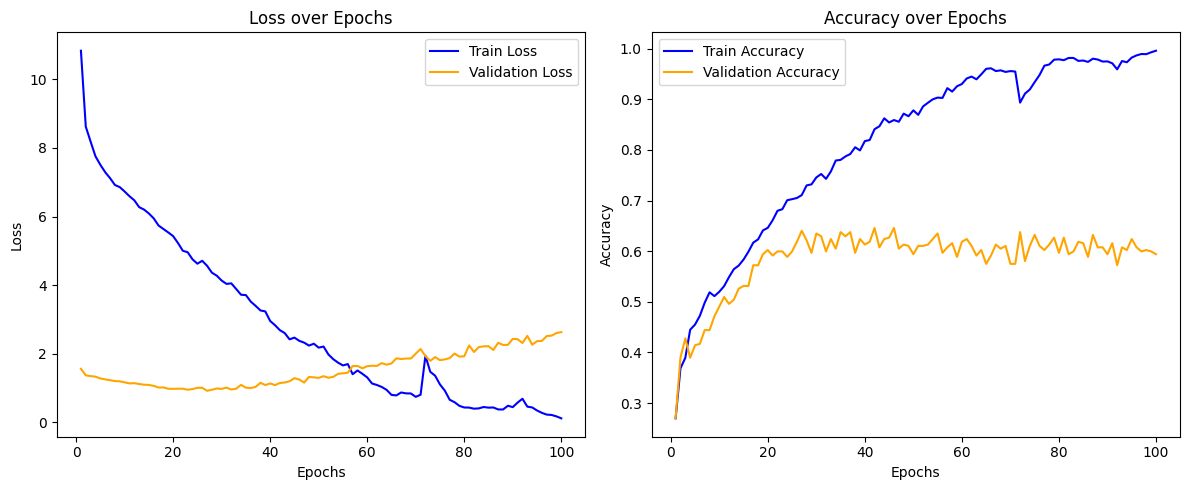

In [12]:
import matplotlib.pyplot as plt

# D·ªØ li·ªáu t·ª´ qu√° tr√¨nh hu·∫•n luy·ªán
epochs = range(1, 101)
train_losses = [
    10.8347, 8.6212, 8.1833, 7.7562, 7.5094, 7.2937, 7.1204, 6.9205, 6.8585, 6.7307,
    6.5934, 6.4742, 6.2744, 6.2038, 6.0901, 5.9475, 5.7380, 5.6366, 5.5363, 5.4301,
    5.2287, 5.0027, 4.9595, 4.7525, 4.6259, 4.7098, 4.5645, 4.3629, 4.2751, 4.1336,
    4.0373, 4.0512, 3.8869, 3.7203, 3.7100, 3.5208, 3.3963, 3.2627, 3.2340, 2.9558,
    2.8321, 2.6883, 2.6024, 2.4199, 2.4705, 2.3761, 2.3246, 2.2377, 2.2931, 2.1778,
    2.2103, 1.9799, 1.8427, 1.7400, 1.6593, 1.6990, 1.4040, 1.5119, 1.4164, 1.3103,
    1.1320, 1.0894, 1.0318, 0.9469, 0.8013, 0.7851, 0.8710, 0.8451, 0.8418, 0.7435,
    0.8047, 1.9393, 1.4734, 1.3593, 1.1042, 0.9240, 0.6587, 0.5875, 0.4809, 0.4335,
    0.4306, 0.3982, 0.4071, 0.4474, 0.4288, 0.4333, 0.3766, 0.3752, 0.4840, 0.4442,
    0.5762, 0.6879, 0.4582, 0.4349, 0.3459, 0.2772, 0.2260, 0.2159, 0.1744, 0.1170
]
val_losses = [
    1.5626, 1.3702, 1.3476, 1.3323, 1.2793, 1.2533, 1.2289, 1.2030, 1.1977, 1.1668,
    1.1351, 1.1430, 1.1173, 1.0980, 1.0907, 1.0646, 1.0162, 1.0180, 0.9791, 0.9766,
    0.9807, 0.9809, 0.9510, 0.9706, 1.0064, 1.0082, 0.9201, 0.9515, 0.9878, 0.9749,
    1.0126, 0.9572, 0.9819, 1.0926, 1.0105, 1.0011, 1.0327, 1.1535, 1.0876, 1.1347,
    1.0862, 1.1469, 1.1614, 1.1984, 1.2874, 1.2478, 1.1590, 1.3238, 1.3117, 1.2970,
    1.3455, 1.3007, 1.3269, 1.4150, 1.4294, 1.4461, 1.6431, 1.6451, 1.5763, 1.6367,
    1.6504, 1.6453, 1.7273, 1.6809, 1.7177, 1.8661, 1.8471, 1.8607, 1.8612, 2.0026,
    2.1386, 1.9338, 1.7925, 1.9036, 1.8114, 1.8358, 1.8726, 2.0063, 1.9166, 1.9256,
    2.2426, 2.0515, 2.1932, 2.2155, 2.2207, 2.1098, 2.3216, 2.2554, 2.2599, 2.4343,
    2.4247, 2.3128, 2.5211, 2.2644, 2.3668, 2.3748, 2.5162, 2.5277, 2.6047, 2.6296
]
train_accuracies = [
    0.2698, 0.3685, 0.3893, 0.4448, 0.4550, 0.4724, 0.4983, 0.5187, 0.5112, 0.5198,
    0.5310, 0.5487, 0.5644, 0.5715, 0.5834, 0.5988, 0.6168, 0.6233, 0.6410, 0.6461,
    0.6611, 0.6798, 0.6829, 0.7006, 0.7027, 0.7050, 0.7108, 0.7299, 0.7319, 0.7456,
    0.7524, 0.7428, 0.7575, 0.7790, 0.7803, 0.7871, 0.7919, 0.8052, 0.7990, 0.8174,
    0.8195, 0.8409, 0.8467, 0.8624, 0.8542, 0.8590, 0.8556, 0.8716, 0.8665, 0.8781,
    0.8692, 0.8859, 0.8931, 0.8999, 0.9033, 0.9026, 0.9220, 0.9152, 0.9257, 0.9302,
    0.9411, 0.9448, 0.9394, 0.9493, 0.9601, 0.9612, 0.9557, 0.9571, 0.9540, 0.9557,
    0.9547, 0.8934, 0.9111, 0.9193, 0.9339, 0.9479, 0.9663, 0.9687, 0.9782, 0.9789,
    0.9772, 0.9816, 0.9816, 0.9758, 0.9765, 0.9738, 0.9802, 0.9785, 0.9745, 0.9748,
    0.9710, 0.9591, 0.9755, 0.9731, 0.9823, 0.9867, 0.9894, 0.9891, 0.9928, 0.9959
]
val_accuracies = [
    0.2698, 0.3896, 0.4278, 0.3896, 0.4142, 0.4169, 0.4441, 0.4441, 0.4714, 0.4905,
    0.5095, 0.4959, 0.5041, 0.5259, 0.5313, 0.5313, 0.5722, 0.5722, 0.5940, 0.6022,
    0.5913, 0.5995, 0.5995, 0.5886, 0.5995, 0.6185, 0.6403, 0.6213, 0.5967, 0.6349,
    0.6294, 0.5995, 0.6240, 0.6049, 0.6376, 0.6294, 0.6376, 0.5967, 0.6240, 0.6131,
    0.6185, 0.6458, 0.6076, 0.6240, 0.6267, 0.6458, 0.6049, 0.6131, 0.6104, 0.5940,
    0.6104, 0.6104, 0.6131, 0.6240, 0.6349, 0.5967, 0.6076, 0.6158, 0.5886, 0.6185,
    0.6240, 0.6104, 0.5913, 0.6022, 0.5749, 0.5913, 0.6131, 0.6049, 0.6104, 0.5749,
    0.5749, 0.6376, 0.5804, 0.6104, 0.6322, 0.6104, 0.6022, 0.6131, 0.6267, 0.5967,
    0.6267, 0.5940, 0.5995, 0.6185, 0.6158, 0.5886, 0.6322, 0.6076, 0.6076, 0.5940,
    0.6158, 0.5722, 0.6076, 0.6022, 0.6240, 0.6076, 0.5995, 0.6022, 0.5995, 0.5940
]

# V·∫Ω bi·ªÉu ƒë·ªì Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label="Train Loss", color='blue')
plt.plot(epochs, val_losses, label="Validation Loss", color='orange')
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# V·∫Ω bi·ªÉu ƒë·ªì Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label="Train Accuracy", color='blue')
plt.plot(epochs, val_accuracies, label="Validation Accuracy", color='orange')
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.tight_layout()
plt.show()



In [14]:
from transformers import ViTForImageClassification

# Mapping gi·ªØa id v√† label
id2label = {id: label for id, label in enumerate(classes)}
label2id = {label: id for id, label in id2label.items()}

# T·∫£i m√¥ h√¨nh ViT cho b√†i to√°n ph√¢n lo·∫°i
model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224-in21k',  # M√¥ h√¨nh ViT pretrained
    num_labels=num_classes,  # S·ªë nh√£n
    id2label=id2label,  # Mapping t·ª´ id sang label
    label2id=label2id   # Mapping t·ª´ label sang id
)

# S·ª≠ d·ª•ng GPU n·∫øu c√≥
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [16]:
!pip install evaluate


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84.0/84.0 kB 6.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 480.6/480.6 kB 19.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 179.3/179.3 kB 13.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 10.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 15.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Fou

In [17]:
import evaluate
import numpy as np

# T·∫£i metric "accuracy" t·ª´ th∆∞ vi·ªán evaluate
metric = evaluate.load("accuracy")

# H√†m t√≠nh to√°n ch·ªâ s·ªë ƒë√°nh gi√°
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)  # L·∫•y nh√£n d·ª± ƒëo√°n c√≥ x√°c su·∫•t cao nh·∫•t
    return metric.compute(predictions=predictions, references=labels)


In [18]:
import torch
from transformers import ViTImageProcessor, TrainingArguments, Trainer

# Kh·ªüi t·∫°o feature extractor cho ViT
feature_extractor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

# T√™n metric ƒë·ªÉ ƒë√°nh gi√°
metric_name = "accuracy"

# Thi·∫øt l·∫≠p tham s·ªë hu·∫•n luy·ªán
args = TrainingArguments(
    output_dir="vit_flowers",  # Th∆∞ m·ª•c l∆∞u k·∫øt qu·∫£
    save_strategy="epoch",  # L∆∞u m√¥ h√¨nh sau m·ªói epoch
    evaluation_strategy="epoch",  # ƒê√°nh gi√° tr√™n t·∫≠p validation sau m·ªói epoch
    learning_rate=2e-5,  # T·ªëc ƒë·ªô h·ªçc
    per_device_train_batch_size=32,  # Batch size cho train
    per_device_eval_batch_size=32,  # Batch size cho eval
    num_train_epochs=10,  # S·ªë epoch
    weight_decay=0.01,  # Tr·ªçng s·ªë weight decay
    load_best_model_at_end=True,  # T·∫£i m√¥ h√¨nh t·ªët nh·∫•t sau hu·∫•n luy·ªán
    metric_for_best_model=metric_name,  # Ch·ªçn m√¥ h√¨nh t·ªët nh·∫•t d·ª±a tr√™n metric
    logging_dir='logs',  # Th∆∞ m·ª•c l∆∞u log
    remove_unused_columns=False,  # Gi·ªØ c√°c c·ªôt kh√¥ng s·ª≠ d·ª•ng trong dataset
)

# H√†m collate ƒë·ªÉ x·ª≠ l√Ω batch d·ªØ li·ªáu
def collate_fn(examples):
    # example => Tuple (image, label)
    pixel_values = torch.stack([example[0] for example in examples])  # Stack pixel_values
    labels = torch.tensor([example[1] for example in examples])  # Tensor h√≥a labels
    return {"pixel_values": pixel_values, "labels": labels}

# Kh·ªüi t·∫°o Trainer
trainer = Trainer(
    model=model,  # M√¥ h√¨nh ViT ƒë√£ kh·ªüi t·∫°o
    args=args,  # Tham s·ªë hu·∫•n luy·ªán
    train_dataset=train_dataset,  # T·∫≠p train
    eval_dataset=valid_dataset,  # T·∫≠p validation
    data_collator=collate_fn,  # H√†m collate ƒë·ªÉ chu·∫©n b·ªã batch
    compute_metrics=compute_metrics,  # H√†m t√≠nh metric
    tokenizer=feature_extractor,  # Feature extractor cho h√¨nh ·∫£nh
)


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-18-54395ec6c37d>:34: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [19]:
# Hu·∫•n luy·ªán m√¥ h√¨nh
trainer.train()

# D·ª± ƒëo√°n tr√™n t·∫≠p test
outputs = trainer.predict(test_dataset)

# In c√°c ch·ªâ s·ªë ƒë√°nh gi√°
print(outputs.metrics)


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


{'test_loss': 0.19551897048950195, 'test_accuracy': 0.9673024523160763, 'test_runtime': 5.2655, 'test_samples_per_second': 69.699, 'test_steps_per_second': 2.279}


In [20]:
trainer.save_model("vit_best_model")
